# **Customer Segmentation Data**
Final project for Machine Learning Course

Team Member:
1. Rayhan Almer Kusumah (5025211115)
2. Al-Ferro Yudisthira Putra (5025211176)
3. Shazia Ingeyla Naveeda (5025211203)
---
---

---
### **IMPORT LIBRARIES & OTHER DEPENDENCIES**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---
### **DATA WRANGLING**
---

#### DATA GATHERING
---

In [2]:
raw_df = pd.read_csv("customer_segmentation_data.csv", delimiter=",")
raw_df.head(10)

Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   
5        60937   41  Female      Separated    Master's Degree   
6        37676   55    Male         Single  Bachelor's Degree   
7        54100   35    Male        Married    Master's Degree   
8        30476   43  Female         Single          Doctorate   
9        39071   32  Female         Single    Master's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   
5          Uttar Pradesh         Nurse         87188         policy5   
6              Rajasthan       Manager         94891         policy3   
7       Himachal Pradesh        Artist         61003         policy1   
8                Manipur   Salesperson        116249         policy1   
9                Gujarat        Artist         49083         policy3   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                               Chat   
2       06-05-2021                              Email   
3       09-02-2018                               Chat   
4       09-10-2018                               Chat   
5        9/19/2020                               Chat   
6       07-04-2021                               Chat   
7       11-01-2021                              Phone   
8        9/20/2020                         Mobile App   
9        4/24/2020                              Phone   

  Insurance Products Owned  Coverage Amount  Premium Amount Policy Type  \
0                  policy2           366603            2749       Group   
1                  policy1           780236            1966       Group   
2                  policy3           773926            4413       Group   
3                  policy2           787815            4342      Family   
4                  policy4           366506            1276      Family   
5                  policy1           570757            1106  Individual   
6                  policy2           604069            3661       Group   
7                  policy3           418997            1148    Business   
8                  policy4           319423            2612    Business   
9                  policy1           701577            4595       Group   

  Customer Preferences Preferred Communication Channel Preferred Contact Time  \
0                Email               In-Person Meeting              Afternoon   
1                 Mail               In-Person Meeting                Morning   
2                Email                            Mail                Evening   
3                 Text               In-Person Meeting                Anytime   
4                Email                            Text               Weekends   
5                 Text                            Text              Afternoon   
6    In-Person Meeting                            Text               Weekends   
7                Email                           Phone                Morning   
8    In-Person Meeting                            Text               Weekends   
9                Phone                           Email               Weekends   

  Preferred Language Segmentation Group  
0            English           Segment5  
1             French           Segment5  
2             German  

#### DATA ASSESSING
---

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [4]:
raw_df.describe()

Customer ID           Age   Income Level  Coverage Amount  \
count   53503.000000  53503.000000   53503.000000     53503.000000   
mean    52265.204998     44.140945   82768.324318    492580.789638   
std     28165.000067     15.079486   36651.075670    268405.505571   
min         1.000000     18.000000   20001.000000     50001.000000   
25%     28950.500000     32.000000   51568.500000    249613.500000   
50%     55858.000000     43.000000   80719.000000    477261.000000   
75%     76096.000000     57.000000  115973.500000    739124.000000   
max    100000.000000     70.000000  149999.000000   1000000.000000   

       Premium Amount  
count    53503.000000  
mean      3023.702447  
std       1285.834295  
min        500.000000  
25%       1817.000000  
50%       3194.000000  
75%       4311.500000  
max       5000.000000

In [5]:
raw_df.isna().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [6]:
raw_df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [7]:
raw_df.duplicated().sum()

0

In [8]:
print(raw_df['Segmentation Group'].value_counts())

Segmentation Group
Segment5    13976
Segment2    11442
Segment4    10125
Segment3     9277
Segment1     8683
Name: count, dtype: int64


In [9]:
# balanced_df = raw_df.groupby('Segmentation Group').apply(lambda x: x.sample(n=min(len(x), 8000), random_state=1)).reset_index(drop=True)
# print(balanced_df['Segmentation Group'].value_counts())

balanced_df = raw_df.copy()

In [10]:
unique_counts = balanced_df.nunique()
print(unique_counts)

Customer ID                           40259
Age                                      53
Gender                                    2
Marital Status                            5
Education Level                           5
Geographic Information                   35
Occupation                                9
Income Level                          42779
Behavioral Data                           5
Purchase History                       2016
Interactions with Customer Service        5
Insurance Products Owned                  5
Coverage Amount                       51765
Premium Amount                         4460
Policy Type                               4
Customer Preferences                      5
Preferred Communication Channel           5
Preferred Contact Time                    5
Preferred Language                        5
Segmentation Group                        5
dtype: int64


Encoding Data for Correlation Matrix

In [11]:
from sklearn.preprocessing import LabelEncoder
encoded_df = balanced_df.copy()
label_encoders = {}
for column in balanced_df.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])

Correlation Matrix Creation

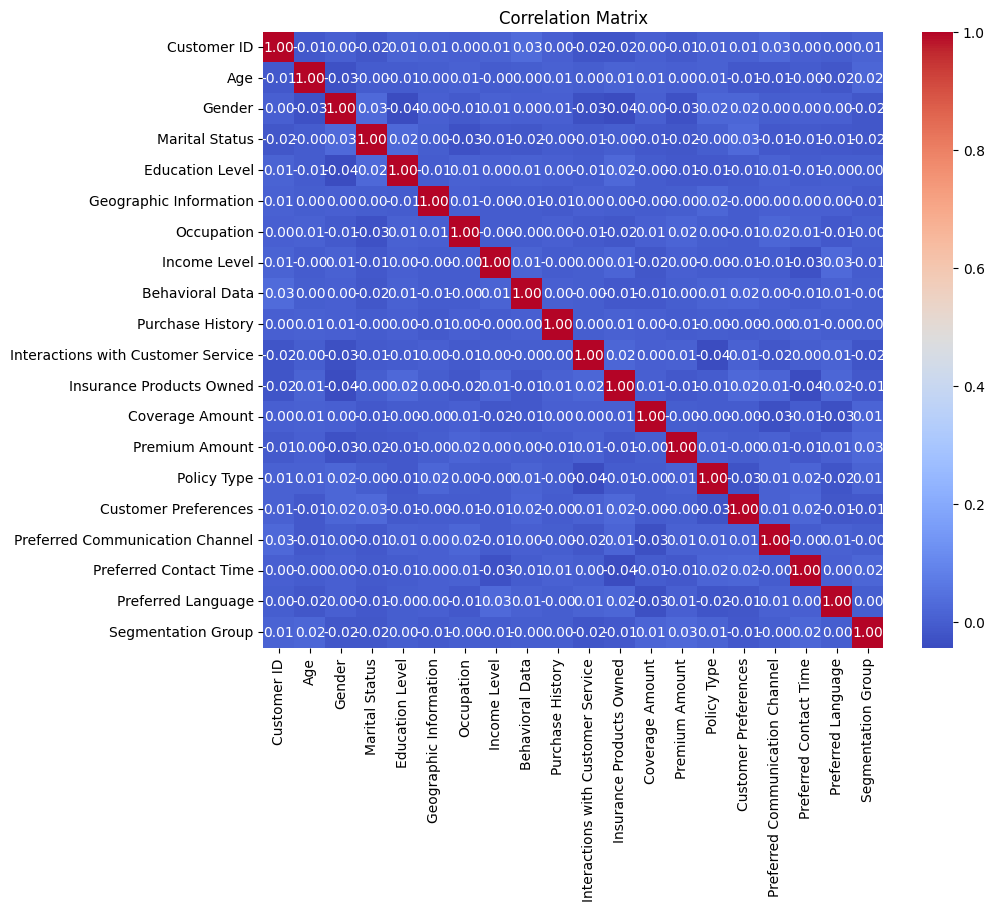

In [12]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Visualize the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### DATA CLEANING
---

In [13]:
balanced__df = raw_df.drop(columns=['Customer ID'])
balanced__df = raw_df.drop(columns=['Purchase History'])

---
### **EXPLORATORY DATA ANALYSIS (EDA)**
---

##### **GENERAL EDA**
---

Finding Outlier

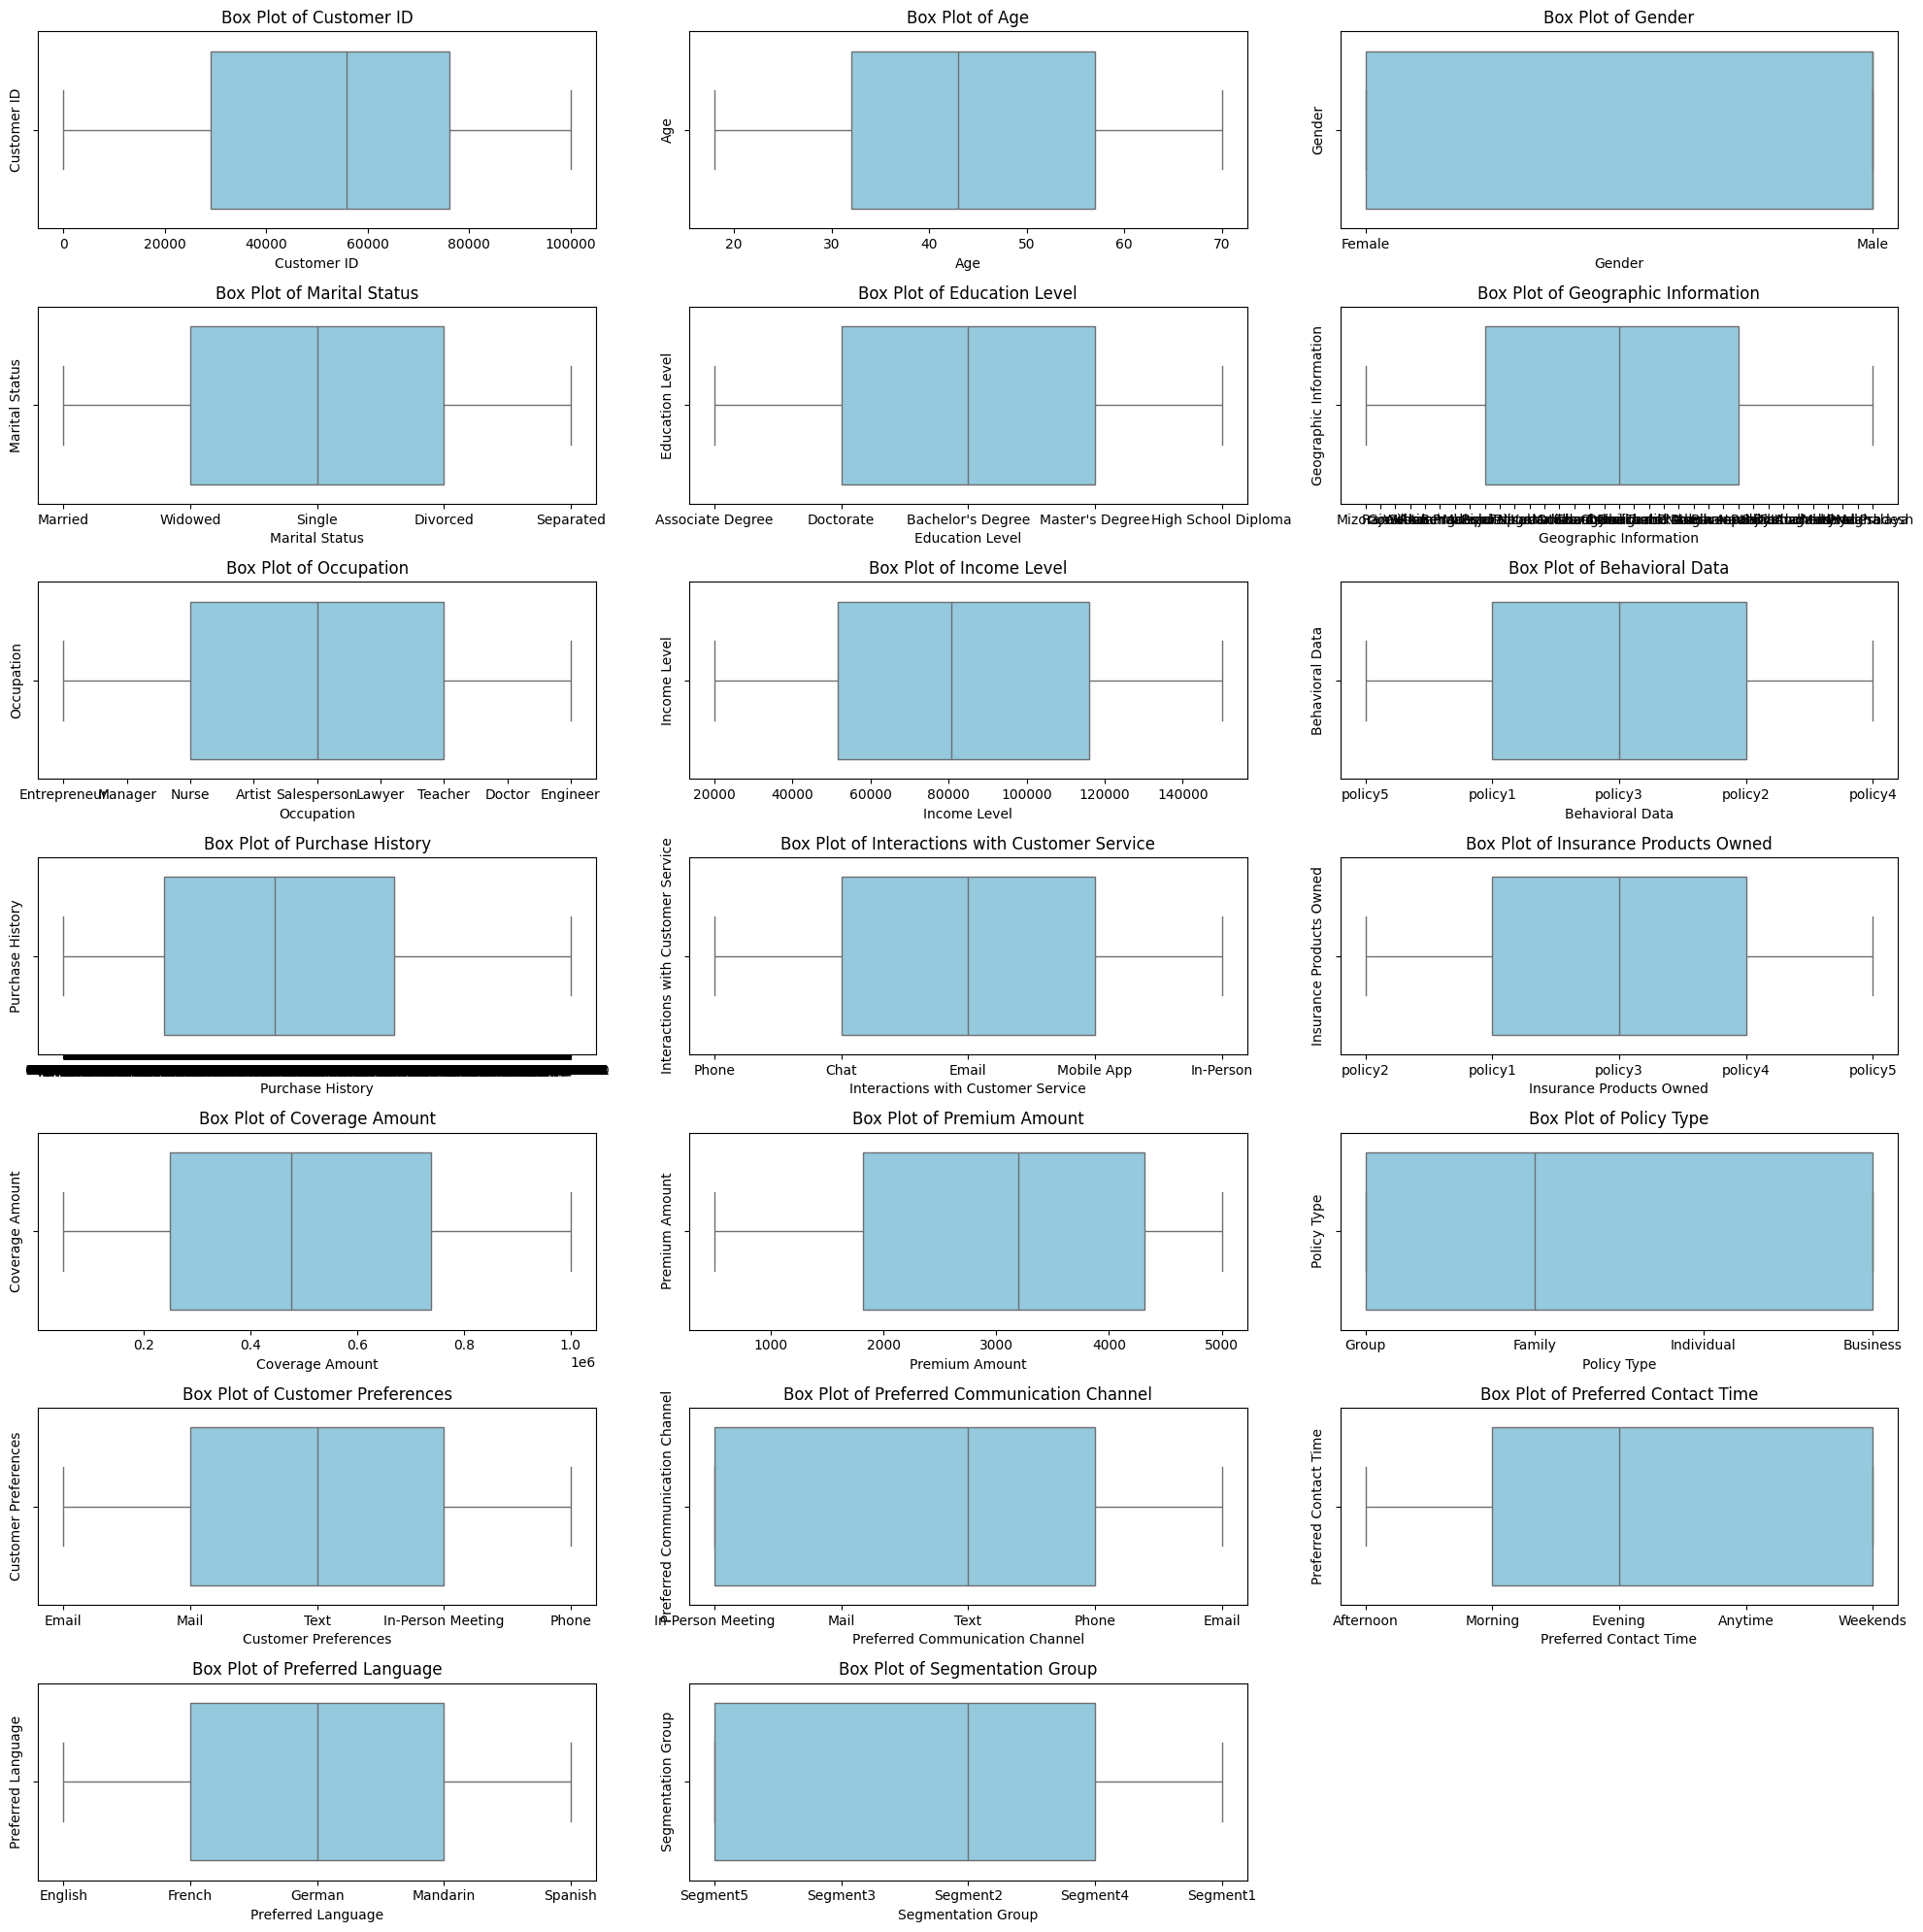

In [14]:
num_cols = balanced_df.shape[1]
cols_per_row = 3  # Number of columns per row
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  # Calculate number of rows

plt.figure(figsize=(20, 20))

for i, column in enumerate(balanced_df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1) 
    sns.boxplot(x=balanced_df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


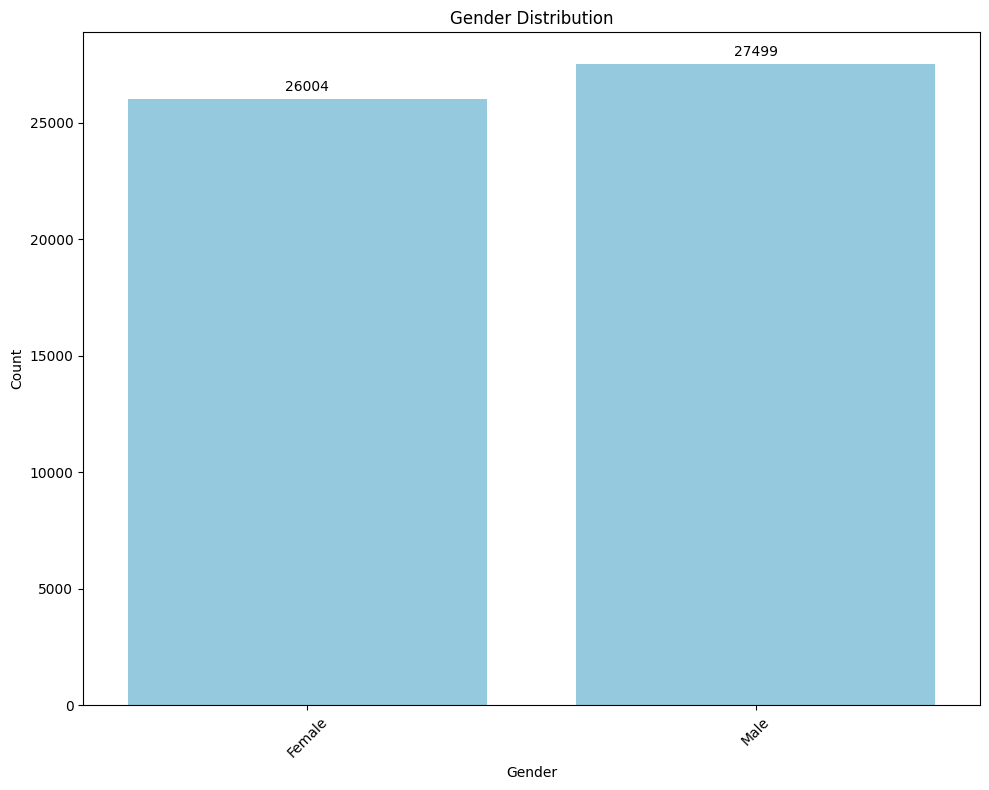

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Gender', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


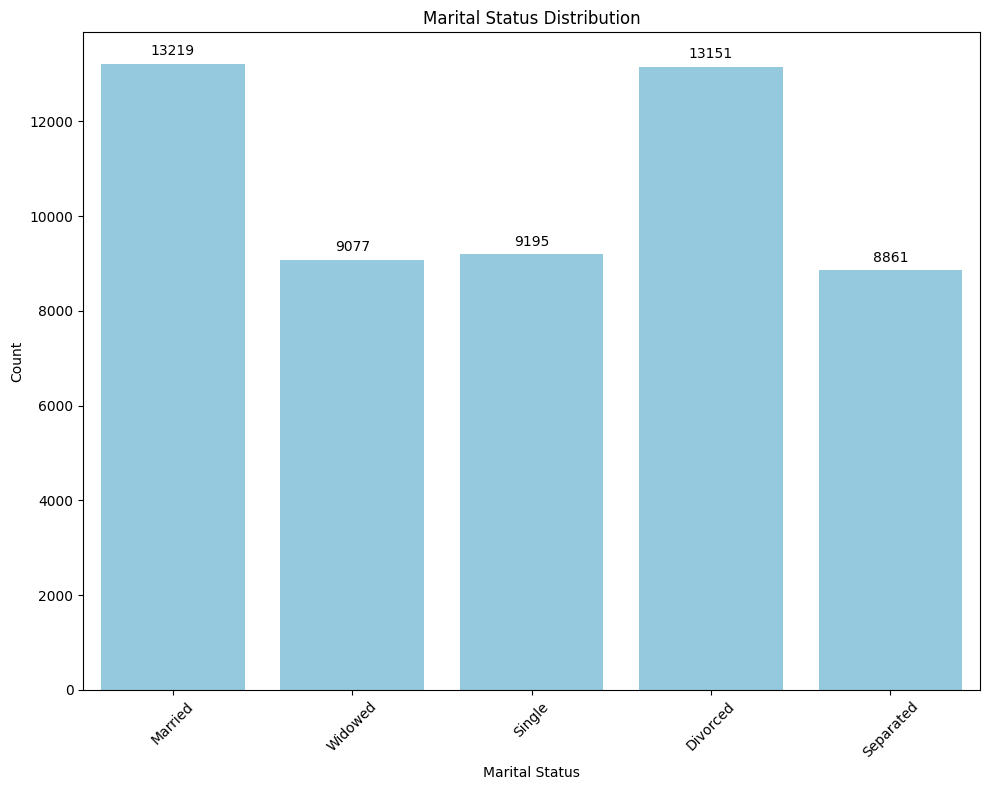

In [16]:
plt.figure(figsize=(10, 8)) 
ax = sns.countplot(x='Marital Status', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


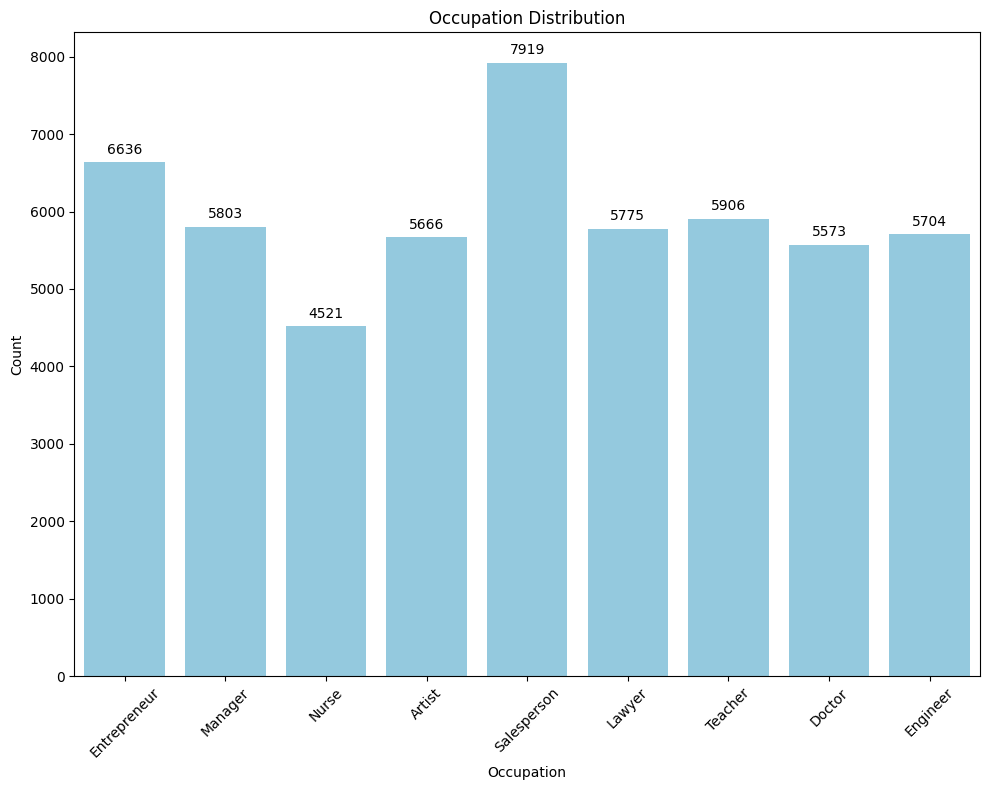

In [17]:
plt.figure(figsize=(10, 8))  
ax = sns.countplot(x='Occupation', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


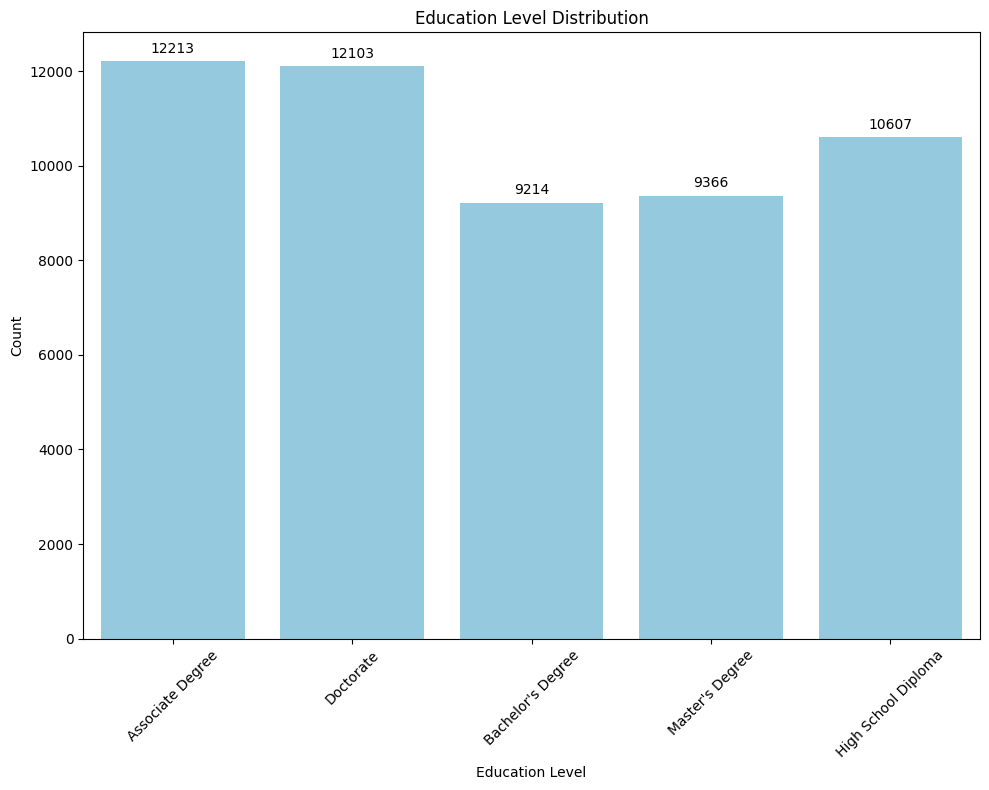

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Education Level', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


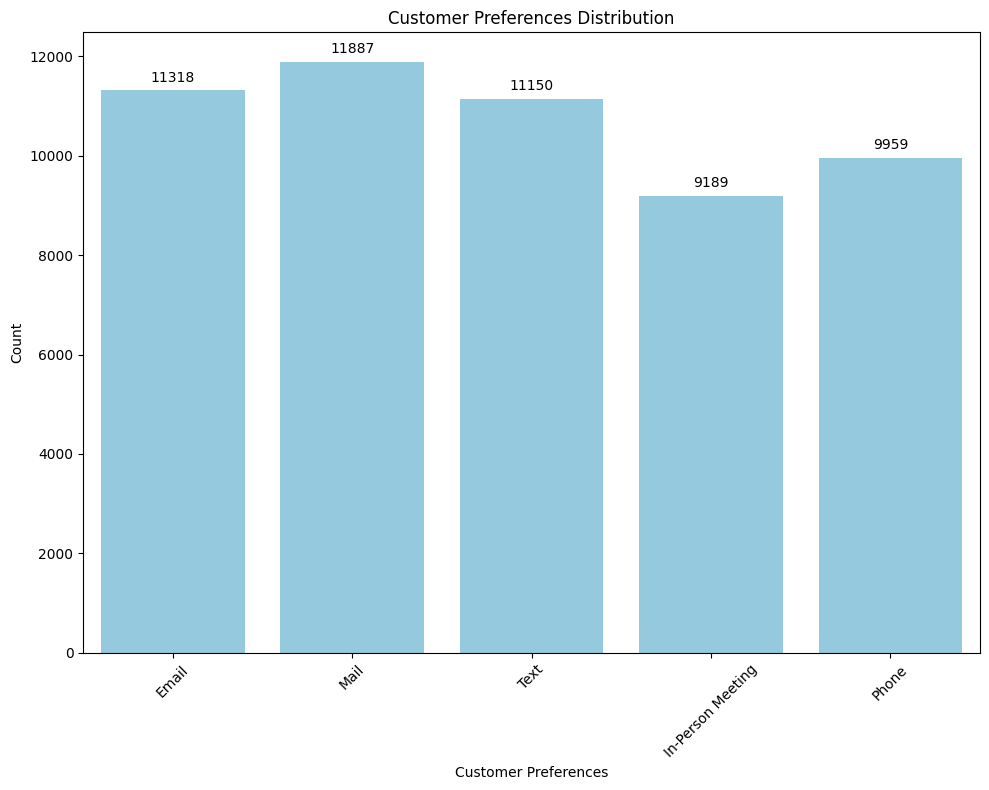

In [19]:
plt.figure(figsize=(10, 8)) 
ax = sns.countplot(x='Customer Preferences', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Customer Preferences Distribution')
plt.xlabel('Customer Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


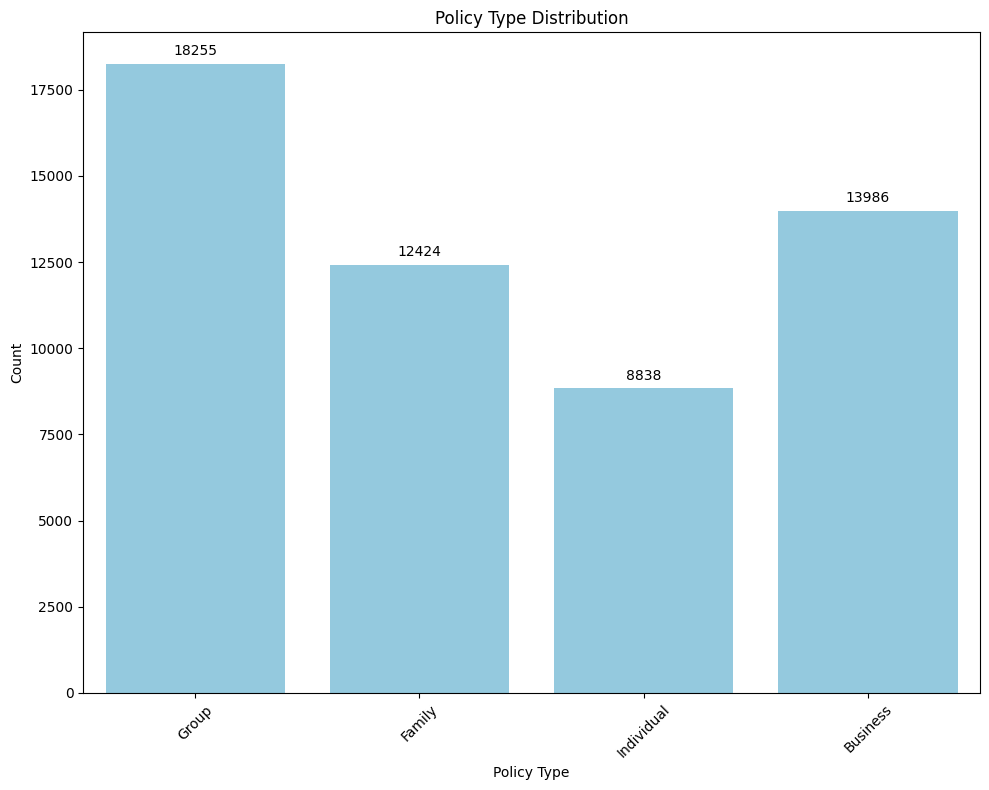

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Policy Type', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Policy Type Distribution')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


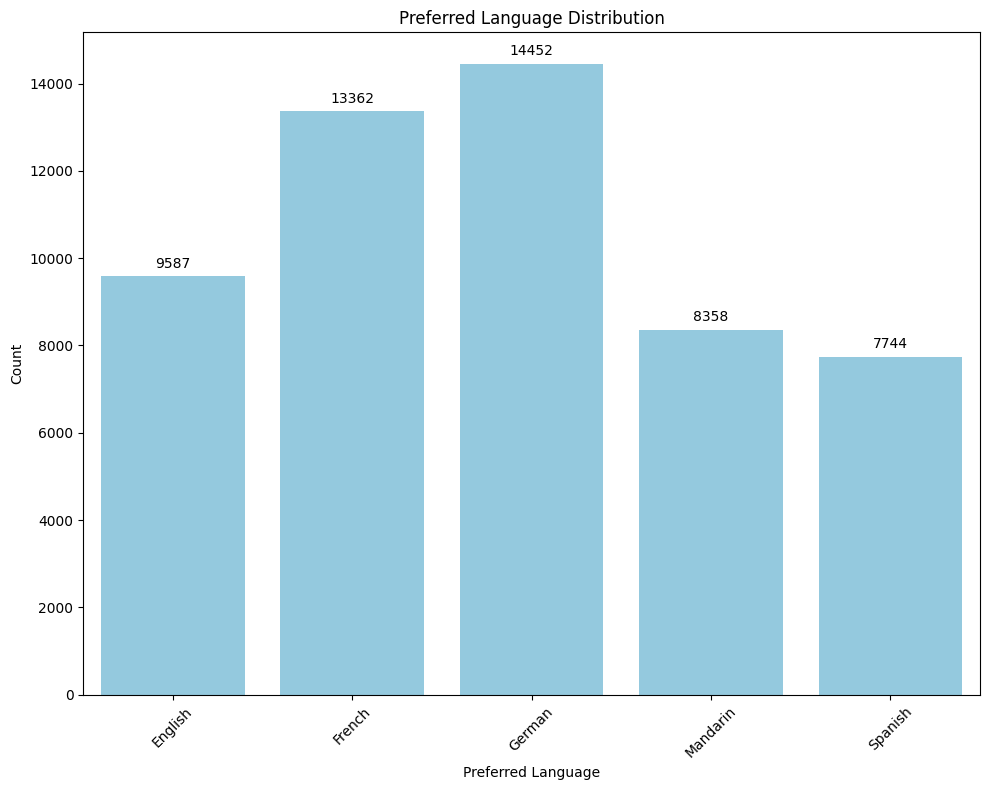

In [21]:
plt.figure(figsize=(10, 8))  
ax = sns.countplot(x='Preferred Language', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Preferred Language Distribution')
plt.xlabel('Preferred Language')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


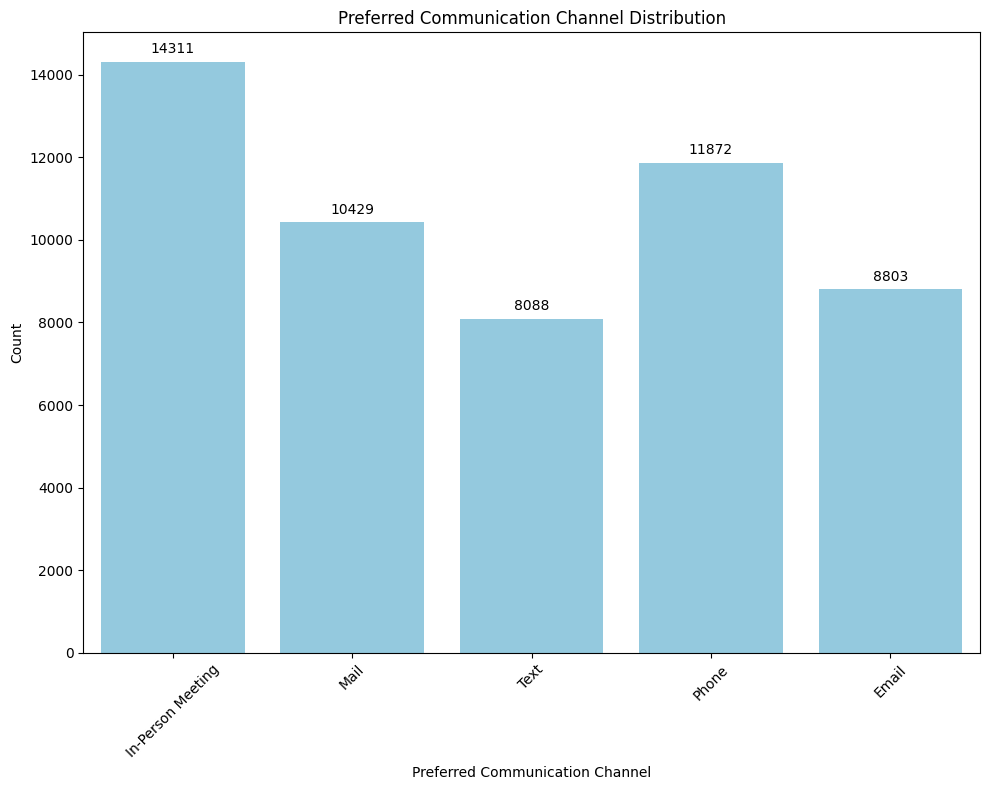

In [22]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.countplot(x='Preferred Communication Channel', data=balanced_df, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Preferred Communication Channel Distribution')
plt.xlabel('Preferred Communication Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


##### **SEGMENTED EDA**
---

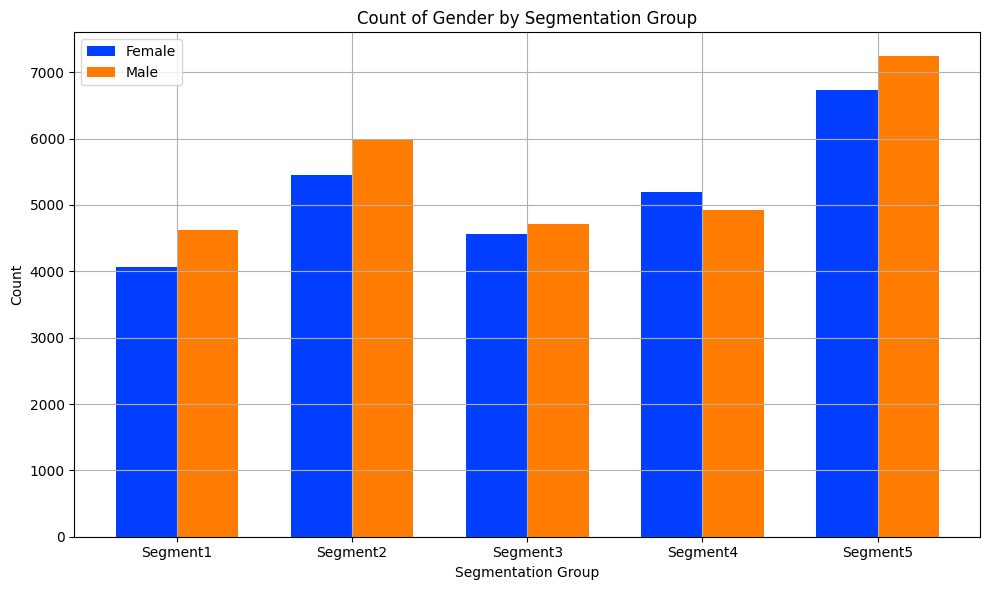

In [23]:
grouped = balanced_df.groupby(['Segmentation Group', 'Gender']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.35
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, gender in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[gender], bar_width, label=gender, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Gender by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

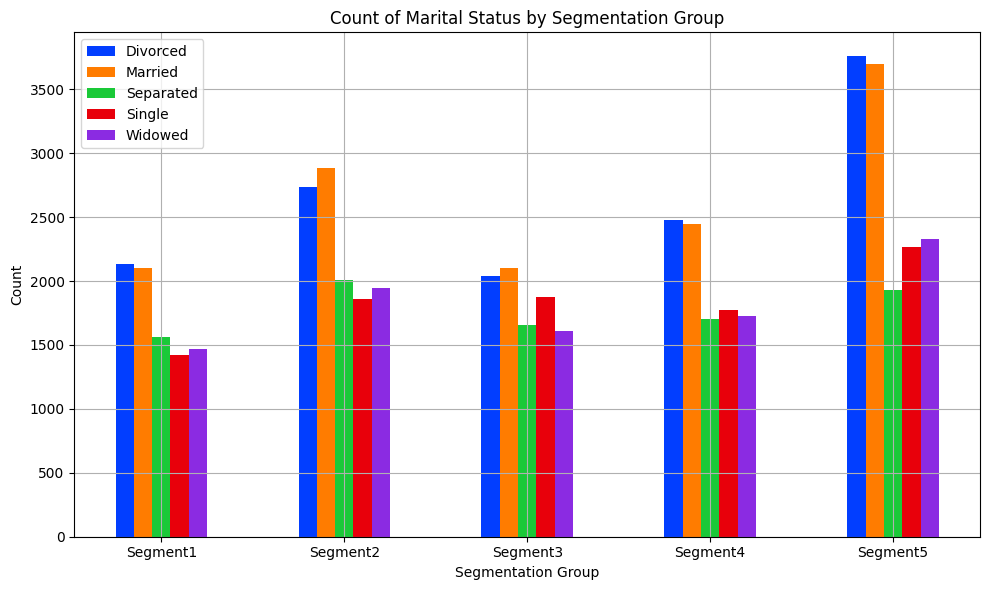

In [24]:
grouped = balanced_df.groupby(['Segmentation Group', 'Marital Status']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, marital in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[marital], bar_width, label=marital, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Marital Status by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

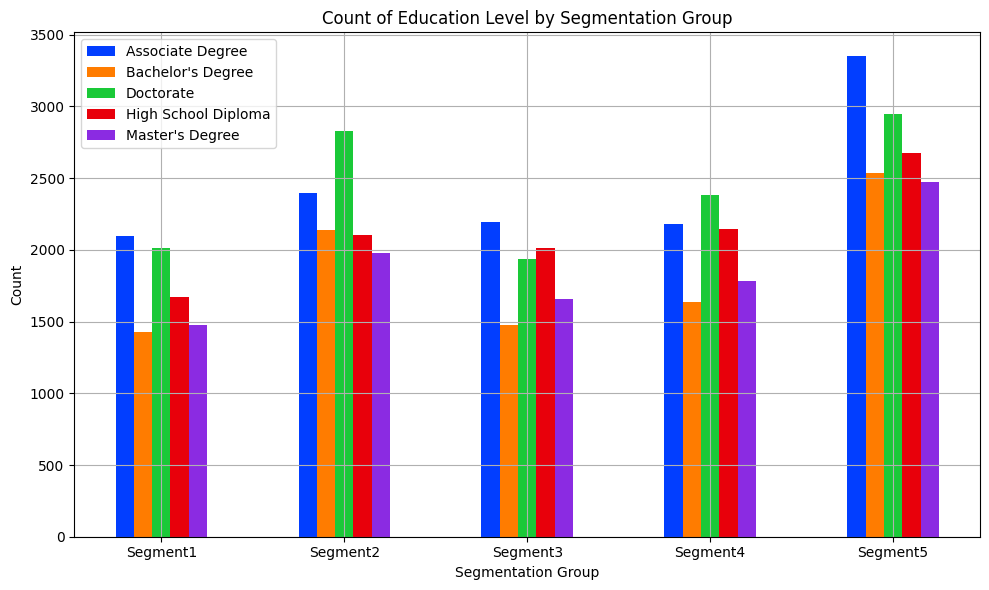

In [25]:
grouped = balanced_df.groupby(['Segmentation Group', 'Education Level']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, education in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[education], bar_width, label=education, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Education Level by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

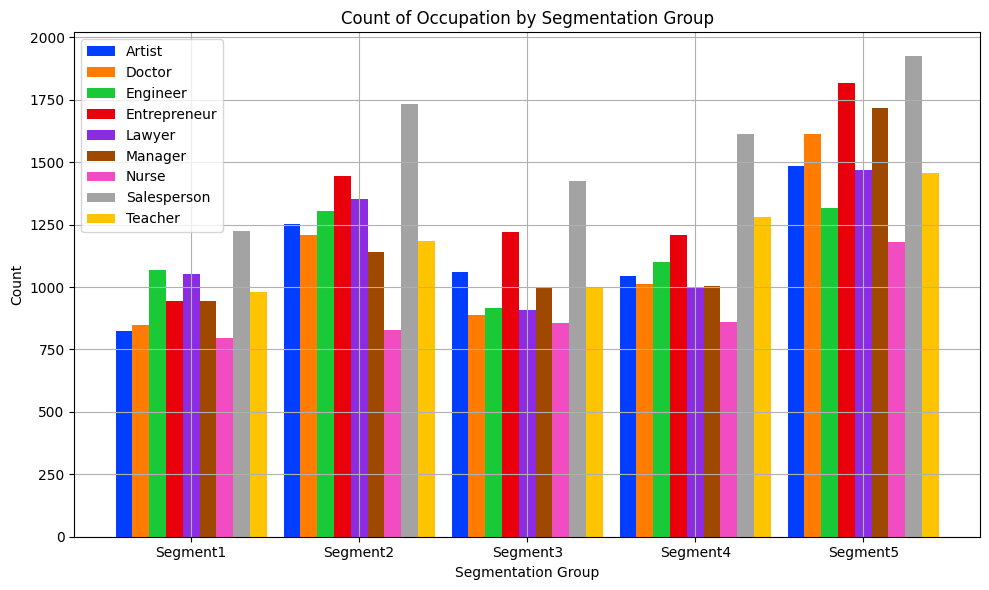

In [26]:
grouped = balanced_df.groupby(['Segmentation Group', 'Occupation']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, occupation in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[occupation], bar_width, label=occupation, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Occupation by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

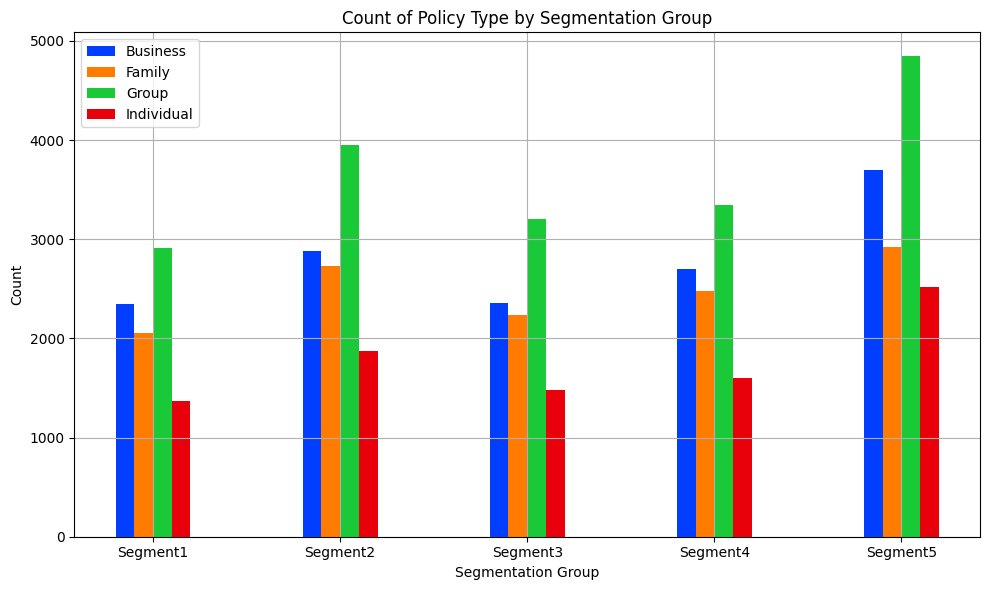

In [27]:
grouped = balanced_df.groupby(['Segmentation Group', 'Policy Type']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, policy in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[policy], bar_width, label=policy, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Policy Type by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

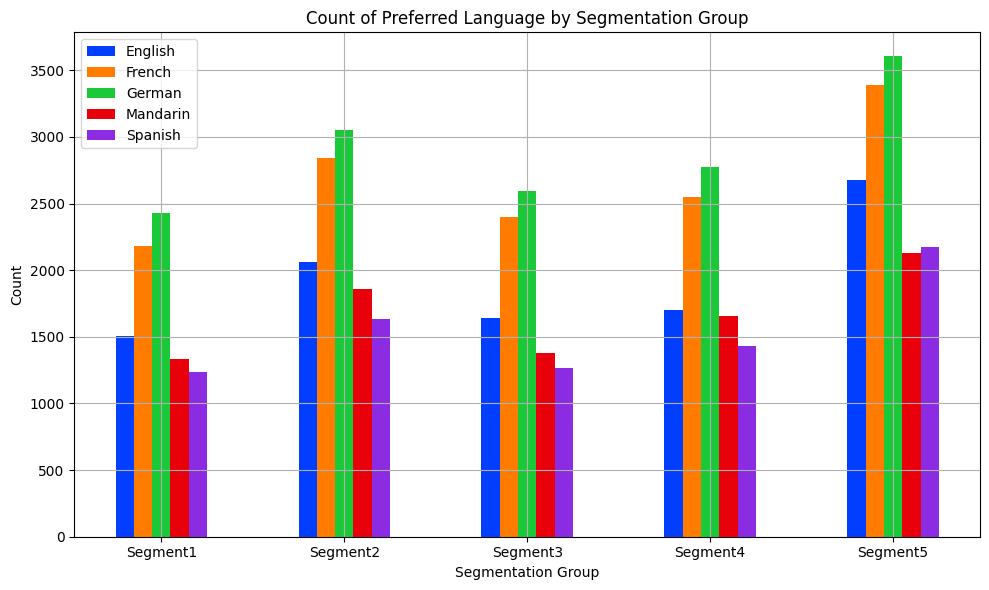

In [28]:
grouped = balanced_df.groupby(['Segmentation Group', 'Preferred Language']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, language in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[language], bar_width, label=language, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Preferred Language by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

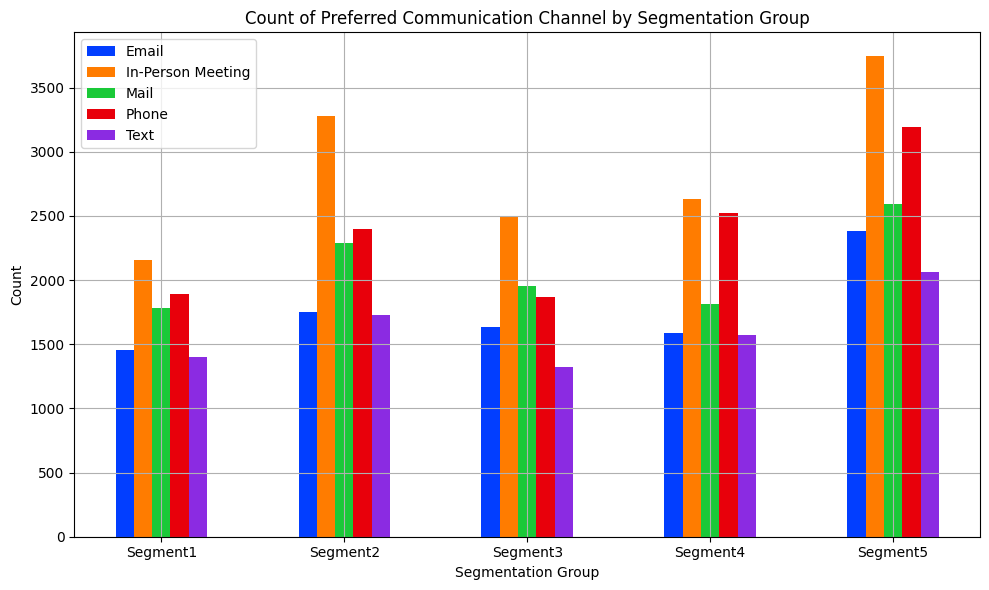

In [29]:

grouped = balanced_df.groupby(['Segmentation Group', 'Preferred Communication Channel']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, preferences in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[preferences], bar_width, label=preferences, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Preferred Communication Channel by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

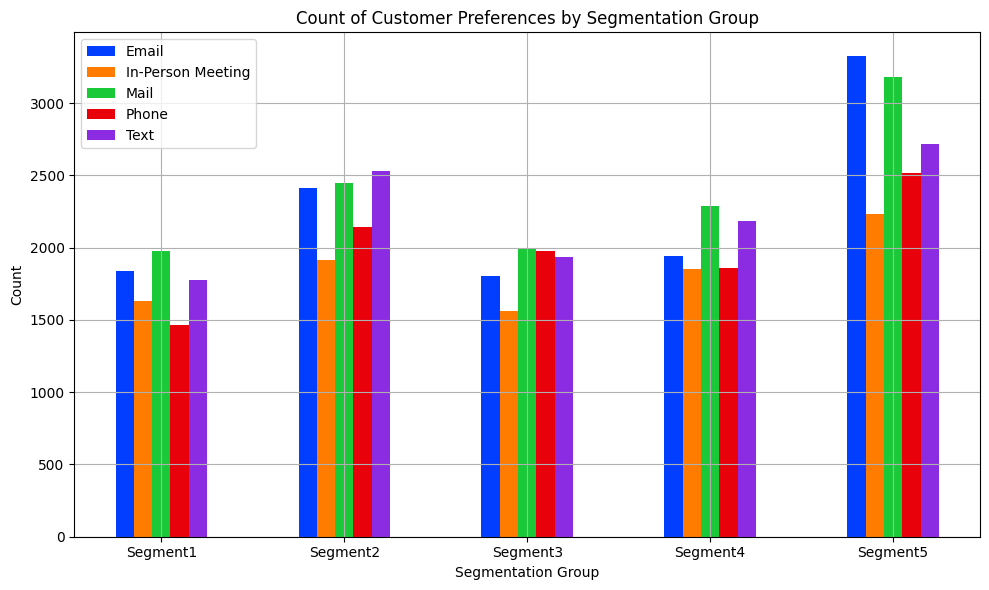

In [30]:

grouped = balanced_df.groupby(['Segmentation Group', 'Customer Preferences']).size().unstack(fill_value=0)
palette = sns.color_palette("bright", len(grouped.columns))

segments = grouped.index
num_segments = len(segments)
bar_width = 0.1
index = np.arange(num_segments)


fig, ax = plt.subplots(figsize=(10, 6))


bars = []
for i, preferences in enumerate(grouped.columns):
    bars.append(ax.bar(index + i * bar_width, grouped[preferences], bar_width, label=preferences, color=palette[i]))

ax.set_xlabel('Segmentation Group')
ax.set_ylabel('Count')
ax.set_title('Count of Customer Preferences by Segmentation Group')
ax.set_xticks(index + (len(grouped.columns) - 1) * bar_width / 2)
ax.set_xticklabels(segments)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

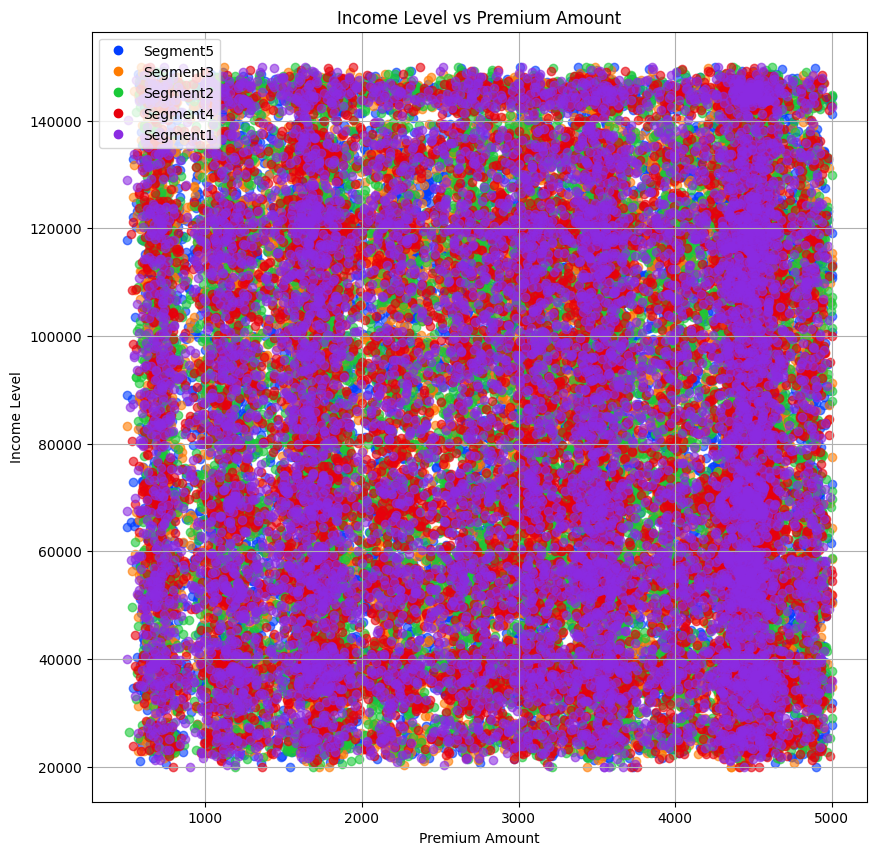

In [31]:
plt.figure(figsize=(10, 10))


for i, group in enumerate(balanced_df['Segmentation Group'].unique()):
    group_data = balanced_df[balanced_df['Segmentation Group'] == group]
    plt.scatter(group_data['Premium Amount'], group_data['Income Level'], color=palette[i], label=f'Segmentation Group {group}', alpha=0.6)

plt.title('Income Level vs Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Income Level')
plt.grid(True)


handles = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette]
plt.legend(handles, balanced_df['Segmentation Group'].unique())

plt.show()


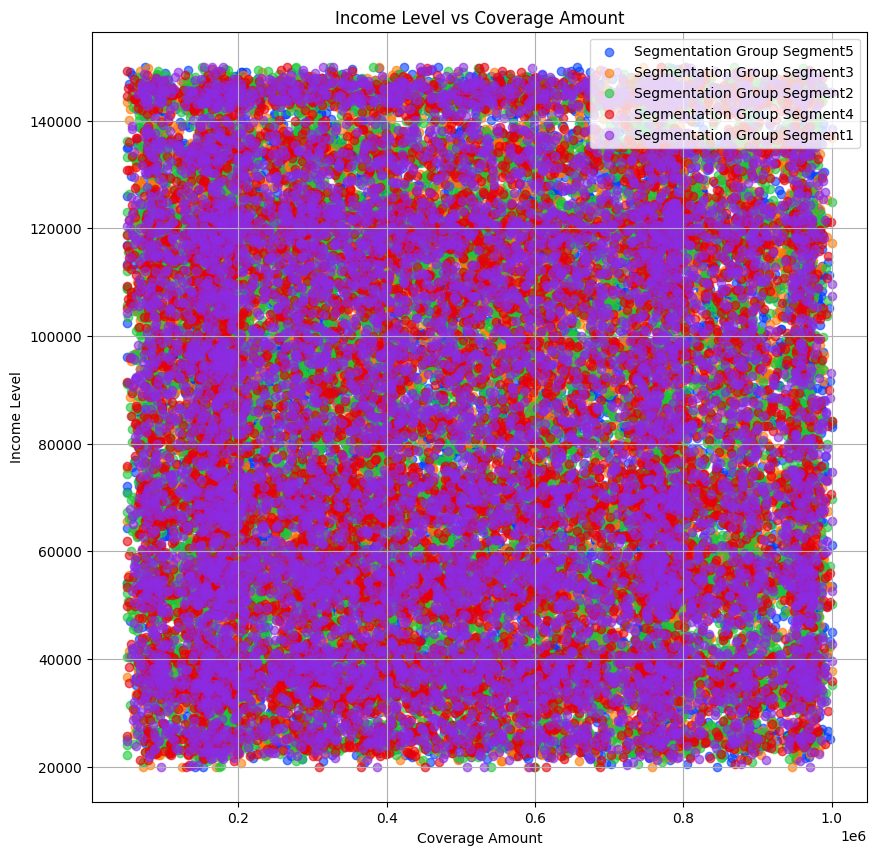

In [32]:
plt.figure(figsize=(10, 10))

for i, group in enumerate(balanced_df['Segmentation Group'].unique()):
    group_data = balanced_df[balanced_df['Segmentation Group'] == group]
    plt.scatter(group_data['Coverage Amount'], group_data['Income Level'], color=palette[i], label=f'Segmentation Group {group}', alpha=0.6)

plt.title('Income Level vs Coverage Amount')
plt.xlabel('Coverage Amount')
plt.ylabel('Income Level')
plt.grid(True)


plt.xscale('linear') 
plt.legend()

plt.show()

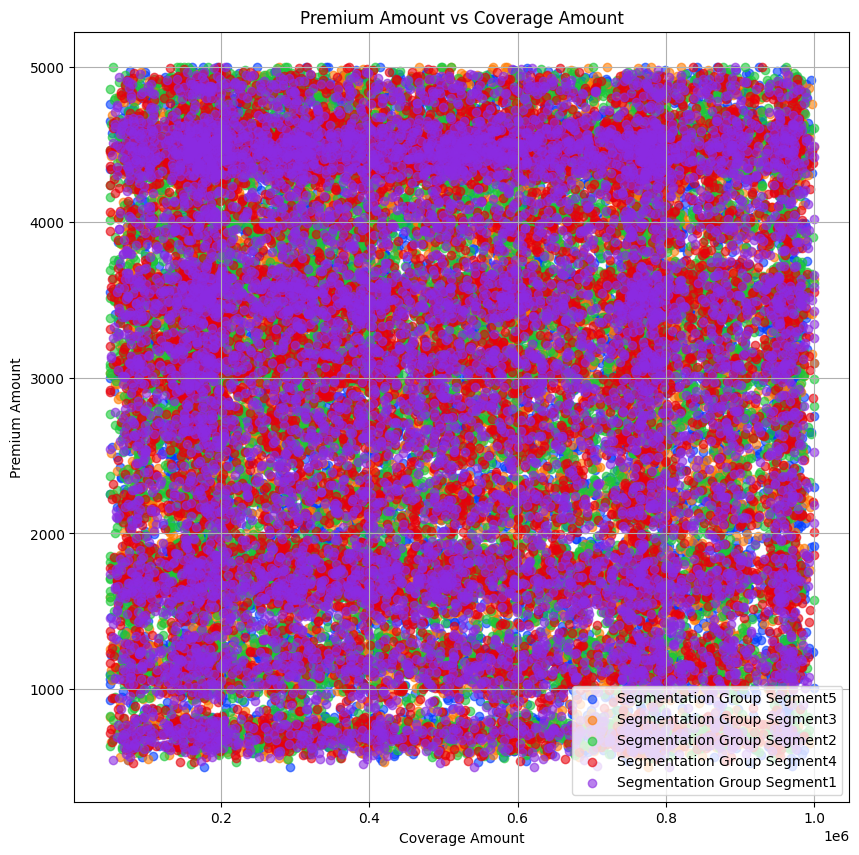

In [33]:
plt.figure(figsize=(10, 10))

for i, group in enumerate(balanced_df['Segmentation Group'].unique()):
    group_data = balanced_df[balanced_df['Segmentation Group'] == group]
    plt.scatter(group_data['Coverage Amount'], group_data['Premium Amount'], color=palette[i], label=f'Segmentation Group {group}', alpha=0.6)

plt.title('Premium Amount vs Coverage Amount')
plt.xlabel('Coverage Amount')
plt.ylabel('Premium Amount')
plt.grid(True)

plt.legend()
plt.xscale('linear') 

plt.show()

---
### **FEATURE EXTRACTION**
---

---
### **MODEL CREATION**
---

---
### **EVALUATION**
---